loading all required libraries      

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

loading data to dataframes

In [2]:
train_ds = pd.read_csv('fraudTrain.csv')
test_ds = pd.read_csv('fraudTest.csv')

In [4]:
train_ds.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [6]:
test_ds.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


Concatenating Data

In [59]:
data=pd.concat([train_ds,test_ds],axis=0)

In [8]:
data.shape

(1852394, 23)

In [9]:
data.diff

<bound method DataFrame.diff of         Unnamed: 0 trans_date_trans_time        cc_num  \
0                0   2019-01-01 00:00:18  2.703186e+15   
1                1   2019-01-01 00:00:44  6.304233e+11   
2                2   2019-01-01 00:00:51  3.885949e+13   
3                3   2019-01-01 00:01:16  3.534094e+15   
4                4   2019-01-01 00:03:06  3.755342e+14   
...            ...                   ...           ...   
555714      555714      31/12/2020 23:59  3.056060e+13   
555715      555715      31/12/2020 23:59  3.556610e+15   
555716      555716      31/12/2020 23:59  6.011720e+15   
555717      555717      31/12/2020 23:59  4.079770e+12   
555718      555718      31/12/2020 23:59  4.170690e+15   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_

In [54]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

Data Cleaning

In [60]:
data= data.drop(['Unnamed: 0'], axis=1)
x =  data.drop(['is_fraud'],axis=1)
col =  x.columns

y= data['is_fraud']

In [71]:
x.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,140408.0,2.703186e+15,514.0,8.0,4.97,164.0,18.0,0.0,576.0,532.0,...,28654,36.0788,-81.1781,3495,372.0,1357.0,80326.0,1325376018,36.011293,-82.048315
1,140409.0,6.304233e+11,241.0,4.0,107.23,312.0,161.0,0.0,439.0,619.0,...,99160,48.8878,-118.2105,149,431.0,1185.0,227462.0,1325376044,49.159047,-118.186462


DATA VISUALIZATION  

Text(0.5, 1.0, 'Credit Card Transaction')

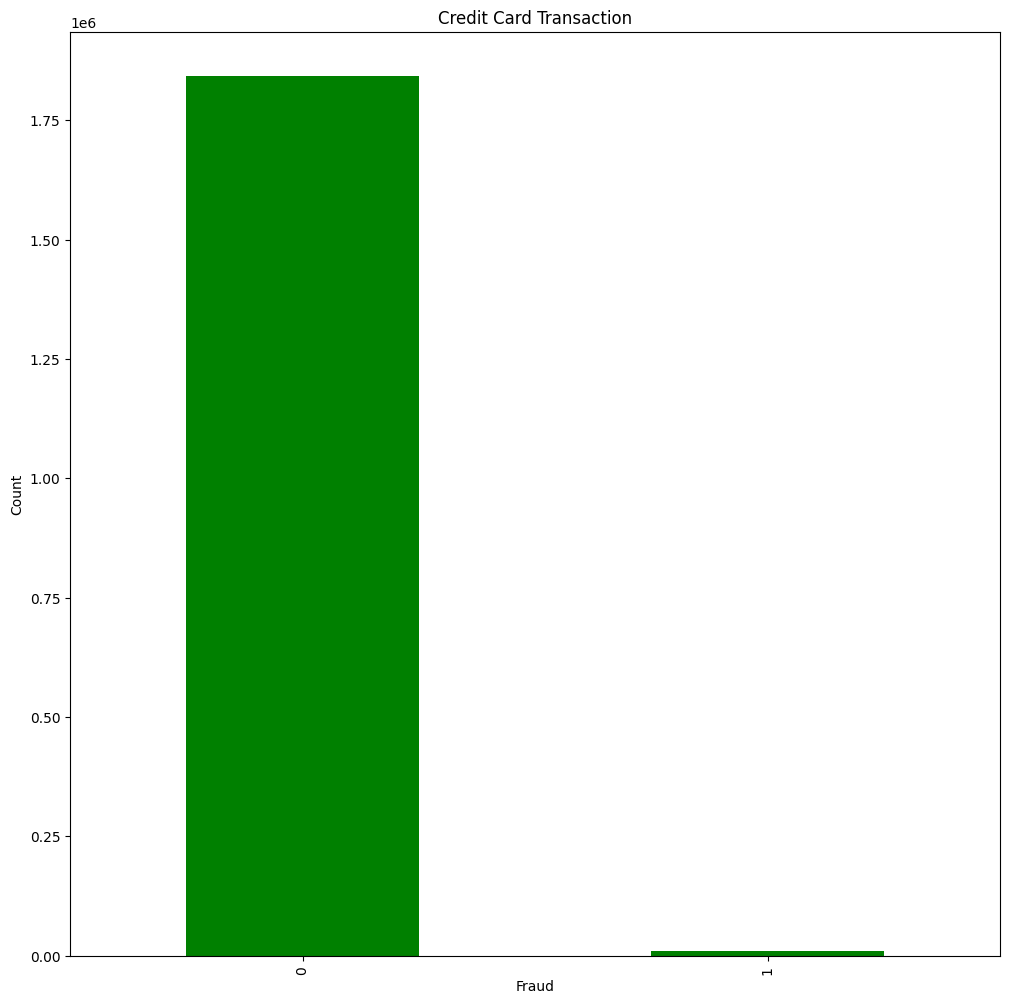

In [70]:
plt.figure(figsize = (12,12))
fraud = data["is_fraud"].value_counts()
fraud.plot(kind="bar" ,color = 'green')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Credit Card Transaction')

C:\Users\hasna\AppData\Local\Temp\ipykernel_15280\1833662399.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heat = data.corr()


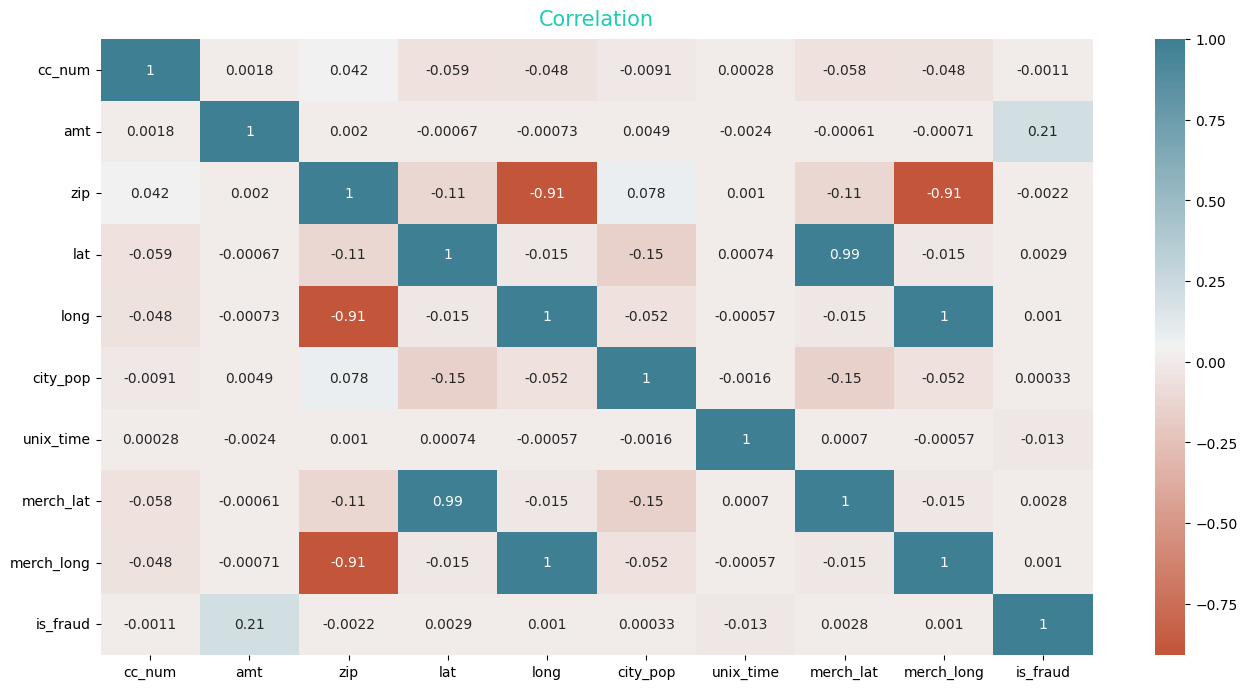

In [73]:
import seaborn as sns
heat = data.corr()
plt.figure(figsize = [16,8])
plt.title("Correlation", size = 15, pad = 10, color = '#1ccdb6')
sns.heatmap(heat, cmap = sns.diverging_palette(20, 220, n = 200), annot = True)
plt.show()

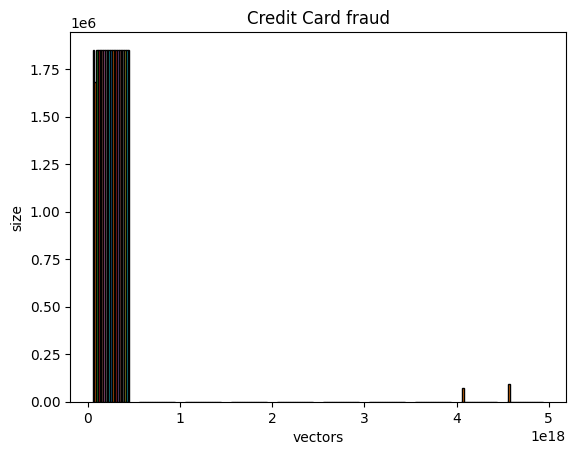

In [75]:
plt.hist(x, edgecolor='black')
plt.title('Credit Card fraud')
plt.xlabel('vectors')
plt.ylabel('size')
plt.show()

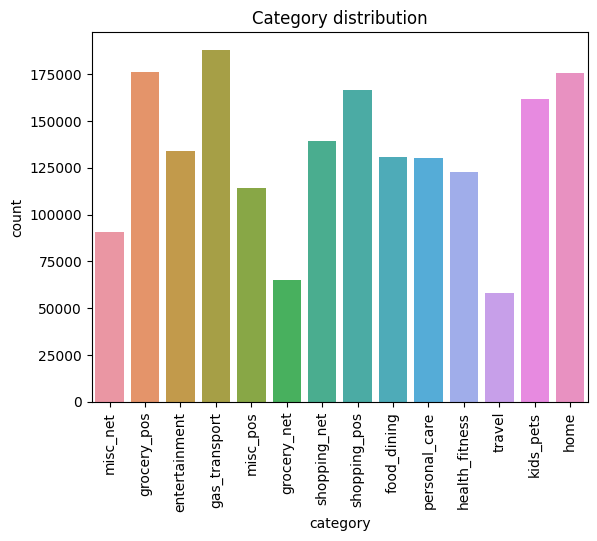

In [77]:
sns.countplot(x='category', data=data)
plt.title('Category distribution')
plt.xticks(rotation=90)
plt.show()

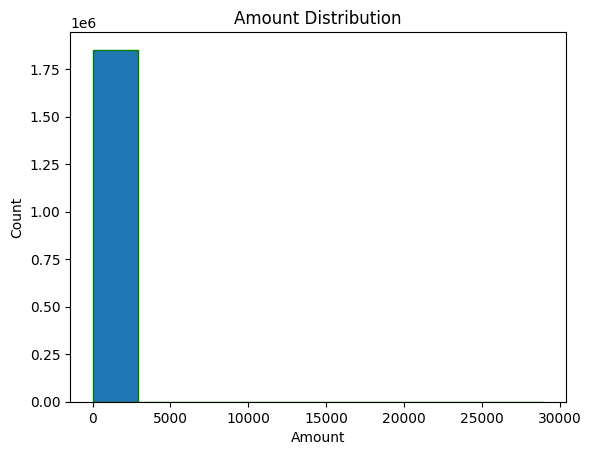

In [78]:
plt.hist(data['amt'], edgecolor='green')
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

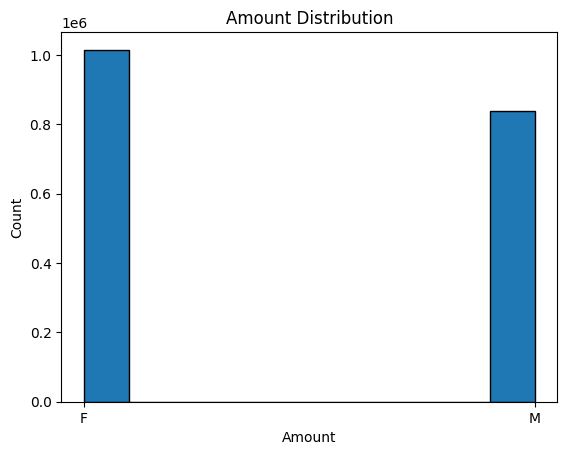

In [80]:
plt.hist(data['gender'], edgecolor='black')
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

In [ ]:
sns.countplot(x='zip', data=data)
plt.title('Category distribution')
plt.xticks(rotation=90)
plt.show()

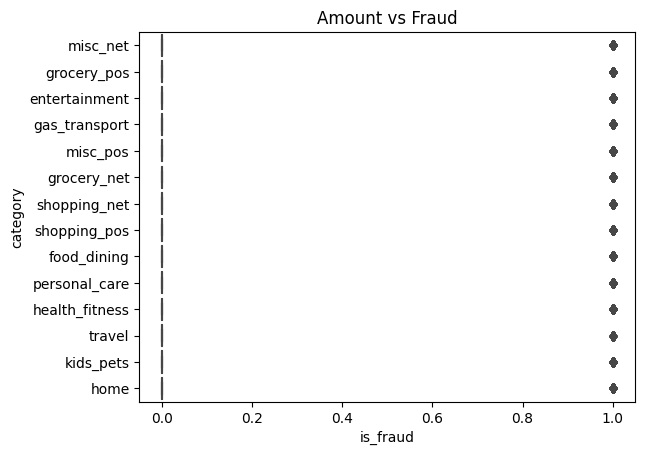

In [91]:
sns.boxplot(x='is_fraud', y='category', data=data)
plt.title("Amount vs Fraud")
plt.show()

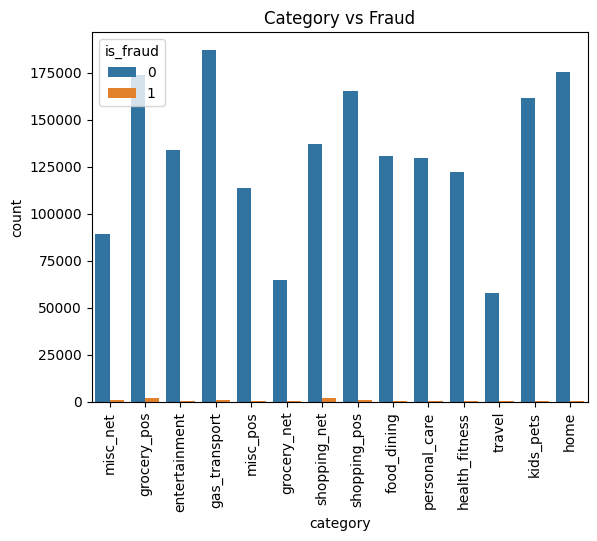

In [92]:
sns.countplot(x='category', hue='is_fraud', data=data)
plt.title("Category vs Fraud")
plt.xticks(rotation=90)
plt.show()

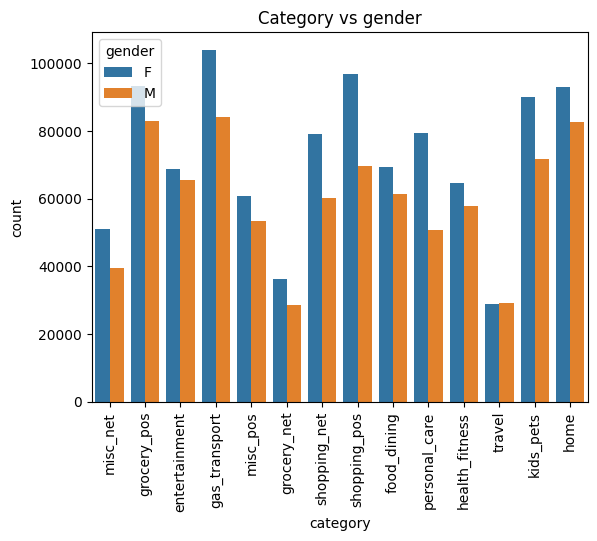

In [94]:
sns.countplot(x='category', hue='gender', data=data)
plt.title("Category vs gender")
plt.xticks(rotation=90)
plt.show()

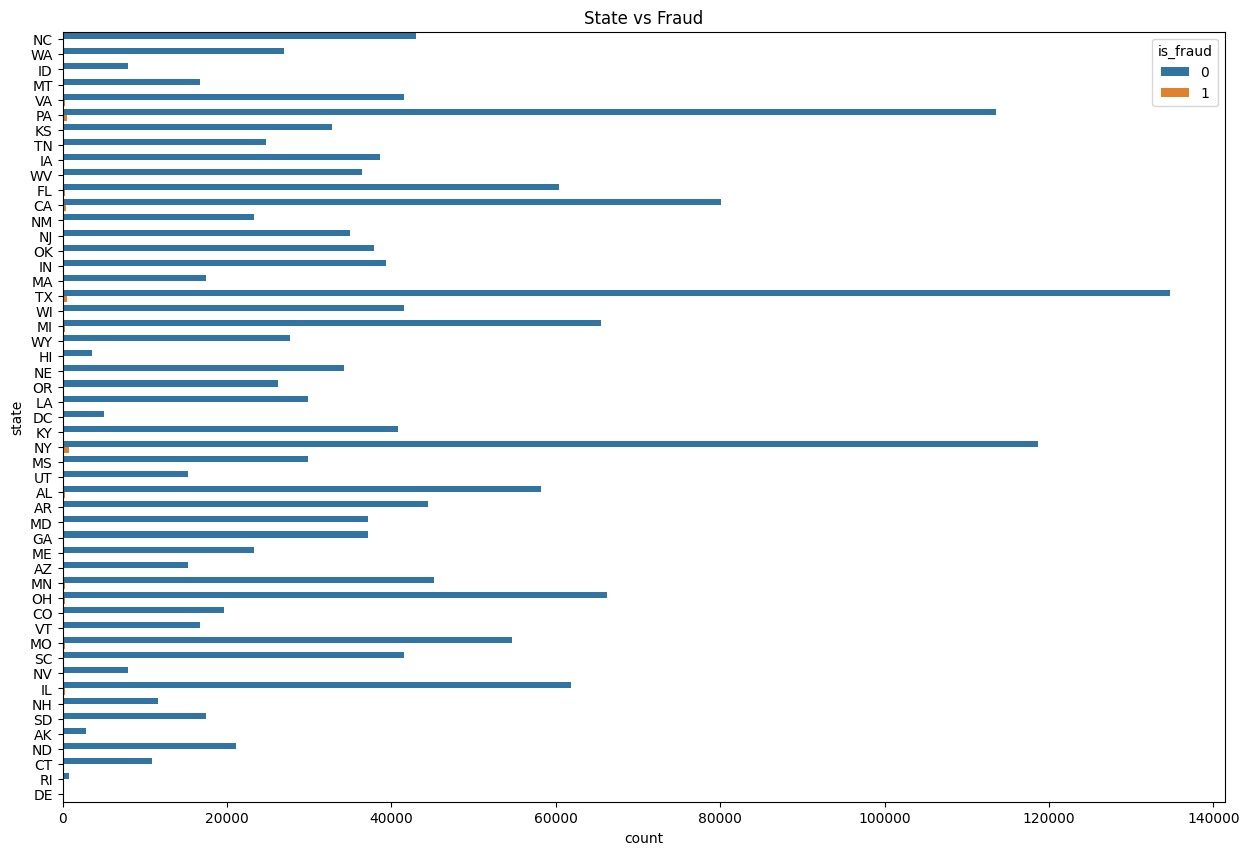

In [97]:
plt.figure(figsize=(15,10))
sns.countplot(y='state', hue='is_fraud', data=data)
plt.title("State vs Fraud")
plt.show()

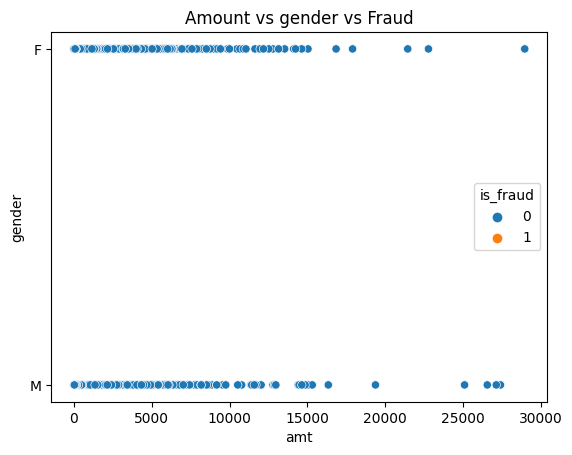

In [102]:
sns.scatterplot(data=data, x='amt', y='gender', hue='is_fraud')
plt.title('Amount vs gender vs Fraud')
plt.show()

Decoding Data

In [61]:
columns = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
        'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
encoder = OrdinalEncoder()
x[columns]= encoder.fit_transform(x[columns])


In [15]:
x.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,140408.0,2.703186e+15,514.0,8.0,4.97,164.0,18.0,0.0,576.0,532.0,...,28654,36.0788,-81.1781,3495,372.0,1357.0,80326.0,1325376018,36.011293,-82.048315
1,140409.0,6.304233e+11,241.0,4.0,107.23,312.0,161.0,0.0,439.0,619.0,...,99160,48.8878,-118.2105,149,431.0,1185.0,227462.0,1325376044,49.159047,-118.186462
2,140410.0,3.885949e+13,390.0,0.0,220.11,116.0,386.0,1.0,610.0,474.0,...,83252,42.1808,-112.2620,4154,308.0,880.0,1169030.0,1325376051,43.150704,-112.154481
3,140411.0,3.534094e+15,360.0,2.0,45.00,165.0,468.0,1.0,945.0,84.0,...,59632,46.2306,-112.1138,1939,330.0,975.0,777909.0,1325376076,47.034331,-112.561071
4,140412.0,3.755342e+14,297.0,9.0,41.96,339.0,153.0,1.0,422.0,217.0,...,24433,38.4207,-79.4629,99,116.0,1312.0,1186866.0,1325376186,38.674999,-78.632459


Data fitting

In [43]:
scaled= MinMaxScaler()
x = scaled.fit_transform(x)
y = data[['is_fraud']].values
x[0]

array([9.34952582e-02, 5.41453585e-04, 7.42774566e-01, 6.15384615e-01,
       1.37142936e-04, 4.63276836e-01, 3.71134021e-02, 0.00000000e+00,
       5.77154309e-01, 5.87845304e-01, 5.40000000e-01, 2.77679802e-01,
       3.43968440e-01, 8.64638464e-01, 1.19449117e-03, 7.50000000e-01,
       7.22962174e-01, 4.33633684e-02, 0.00000000e+00, 3.50306815e-01,
       8.48602977e-01])

In [17]:
from imblearn.under_sampling import NearMiss
nm_sampler = NearMiss()
x_sampled, y_sampled = nm_sampler.fit_resample(x,y)

Distributing Data into train and test Data  

In [18]:
x_train, x_test, y_train, y_test= train_test_split(x_sampled,y_sampled, test_size=0.2, random_state=2)

Applying RandomForestClassifier model

In [19]:
rfc = RandomForestClassifier()
fitting_data= rfc.fit(x_train,y_train)
pred_train= rfc.predict(x_train)
pred_test= rfc.predict(x_test)

testing score

In [25]:
lr_accuracy  =  accuracy_score(y_test,pred_test)
lr_accuracy  

0.9466459466459467

In [28]:
f1= f1_score(y_test,pred_test)
f1

0.9469345698093766

In [30]:
rec= recall_score(y_test,pred_test)
rec

0.9315762797769893

In [31]:
prec= precision_score(y_test,pred_test)
prec

0.962807752750131

In [34]:
classification= classification_report(y_test,pred_test)
print(classification)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1888
           1       0.96      0.93      0.95      1973

    accuracy                           0.95      3861
   macro avg       0.95      0.95      0.95      3861
weighted avg       0.95      0.95      0.95      3861



New Prediction

In [64]:
from testing import decoding_list
new_input=['2019-01-03 16:54:53',  4922710831011201,'fraud_Rau and Sons','grocery_pos',337.05,'Heather','Chase','F','6888 Hicks Stream Suite 954','Manor','PA',15665,40.3359,-79.6607,1472,'Public affairs consultant','1941-03-07','7301679c460c5f2a464b0ecb5c610b47',1325609693,41.174382,-79.809888,]
decode=decoding_list()
newX= decode.decoder(new_input)
let = rfc.predict([newX])
let

array([1], dtype=int64)